## Nataf - Example 1

Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from UQpy.Distributions import Normal, Uniform
dist1 = Normal(loc=0.0, scale=1.0)
dist2 = Normal(loc=0.0, scale=1.0)
Rx = np.array([[1.0, 0.8], [0.8, 1.0]])

In [3]:
nataf_obj = Nataf(dist_object=[dist1,dist2], corr_x=Rx)
print('Cz', nataf_obj.corr_z)
corr_x = Nataf.distortion_z2x(dist_object=[dist1,dist2], corr_z=nataf_obj.corr_z)
print('Cx', corr_x)

Cz [[1.  0.8]
 [0.8 1. ]]
Cx [[1.  0.8]
 [0.8 1. ]]


In [4]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))
Rx = np.array([[1.0, 0.9], [0.9, 1.0]])
nataf_obj = Nataf(dist_object=[dist1,dist2], corr_x=Rx)

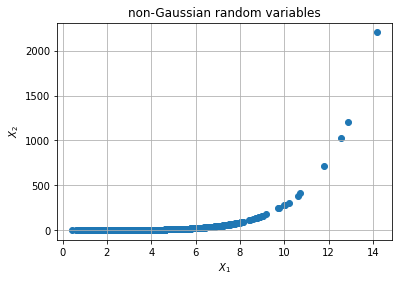

In [5]:
samples_x = nataf_obj.rvs(1000)
plt.figure()
plt.title('non-Gaussian random variables')
plt.scatter(samples_x[:, 0], samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [6]:
nataf_obj.run(samples_x=samples_x, jacobian=True)
print(nataf_obj.corr_z)

[[1.         0.99996829]
 [0.99996829 1.        ]]


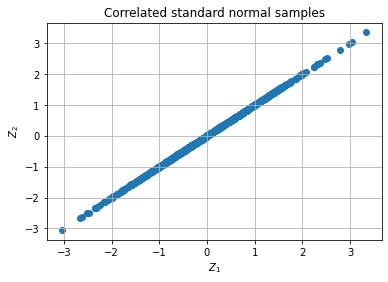

In [7]:
plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(nataf_obj.samples_z[:, 0], nataf_obj.samples_z[:, 1])
plt.grid(True)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

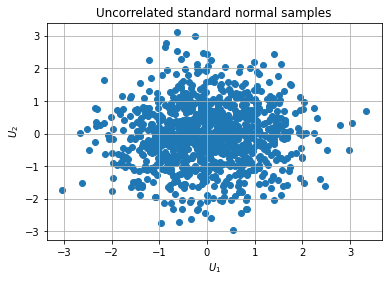

In [8]:
from UQpy.Transformations import Decorrelate

samples_u = Decorrelate(nataf_obj.samples_z, nataf_obj.corr_z).samples_u

plt.figure()
plt.title('Uncorrelated standard normal samples')
plt.scatter(samples_u[:, 0], samples_u[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

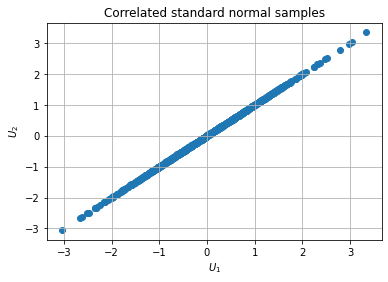

In [9]:
from UQpy.Transformations import Correlate

samples_z = Correlate(samples_u, nataf_obj.corr_z).samples_z

plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(samples_z[:, 0], samples_z[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

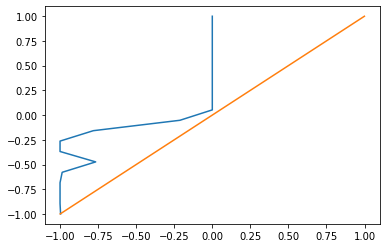

In [10]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))
N = 20
w3 = np.zeros(N)
rho = np.linspace(-0.999, 0.999, N)
for i in range(10):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf([dist1,dist2], corr_x=Rho1).corr_z
    w3[i] = ww[0, 1]

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

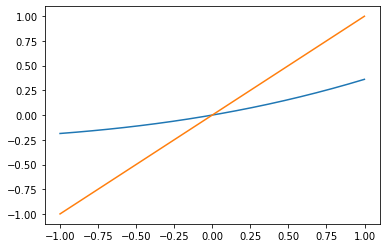

In [11]:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

N = 20
w4 = np.zeros(N)
rho = np.linspace(-0.999, 0.999, N)
for i in range(N):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(dist_object=[dist1,dist2], corr_z=Rho1).corr_x
    w4[i] = ww[0, 1]

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()

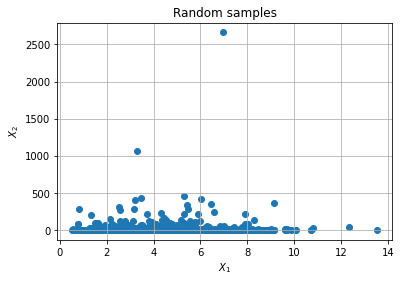

In [12]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

nataf_obj1 = Nataf(dist_object=[dist1,dist2])

samples_x = nataf_obj1.rvs(1000)
plt.figure()
plt.title('Random samples')
plt.scatter(samples_x[:, 0], samples_x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

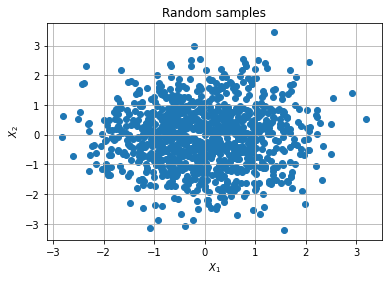

In [13]:
nataf_obj1.run(samples_x=samples_x, jacobian=True)

plt.figure()
plt.title('Random samples')
plt.scatter(nataf_obj1.samples_z[:, 0], nataf_obj1.samples_z[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()